# $(\mu, \lambda)$ Evolution Strategy development

## AMHE

In [1]:
import nn_training.optimizers as optim
import nn_training.experiment_objectives as object_fun
import nn_training.data_utils as dutils

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)

%load_ext autoreload
%autoreload 2

In [2]:
dataset = dutils.UniformDistribution(1, -10, 10)

optimizer = optim.MuLambdaEvolutionStrategy(
    mu_value=25,
    lambda_value=100,
    optimized_func=object_fun.polynomial_func,    # in current experiment f(x) = x ** 2
    dataset=dataset,
)

In [3]:
experiment = optimizer.optimize(
    experiment_name="test",
    in_channels=1,
    n_hidden_neurons=10,
    out_channels=1,
    mutation_tau=0.5,
    mutation_tau_prime=0.5946,
    n_iters=1000,
    probe_times=1000,
    best_loss_treshold=1e-10,
)

Epoch 0 loss => 966.3353
Epoch 1 loss => 992.2815
Epoch 2 loss => 289.0970
Epoch 3 loss => 261.3501
Epoch 4 loss => 329.4296
Epoch 5 loss => 152.5292
Epoch 6 loss => 215.6023
Epoch 7 loss => 145.9880
Epoch 8 loss => 133.5374
Epoch 9 loss => 114.0693
Epoch 10 loss => 136.4543
Epoch 11 loss => 127.1026
Epoch 12 loss => 114.8517
Epoch 13 loss => 125.4783
Epoch 14 loss => 111.6618
Epoch 15 loss => 112.4952
Epoch 16 loss => 112.3723
Epoch 17 loss => 111.5543
Epoch 18 loss => 109.3296
Epoch 19 loss => 112.6350
Epoch 20 loss => 103.4530
Epoch 21 loss => 104.7520
Epoch 22 loss => 103.8903
Epoch 23 loss => 97.8611
Epoch 24 loss => 97.7365
Epoch 25 loss => 98.1972
Epoch 26 loss => 78.3189
Epoch 27 loss => 80.5146
Epoch 28 loss => 66.6535
Epoch 29 loss => 64.9041
Epoch 30 loss => 67.3726
Epoch 31 loss => 66.0771
Epoch 32 loss => 61.9033
Epoch 33 loss => 59.8605
Epoch 34 loss => 61.2610
Epoch 35 loss => 54.7304
Epoch 36 loss => 52.6944
Epoch 37 loss => 46.8162
Epoch 38 loss => 49.4039
Epoch 39 los

In [4]:
f"Best model found after iteration = {experiment.best_individual_iteration}"

'Best model found after iteration = 994'

In [5]:
f"Best model loss = {experiment.best_individual_loss}"

'Best model loss = 0.762581646347257'

In [6]:
# Computes result for visualization
best_individual = experiment.best_individual

xs = []
y_true = []
y_preds = []

for _, x in zip(range(1000), dataset):
    xs.append(x)
    y_true.append(optimizer.optimized_func(x))
    y_preds.append(best_individual.predict(x))

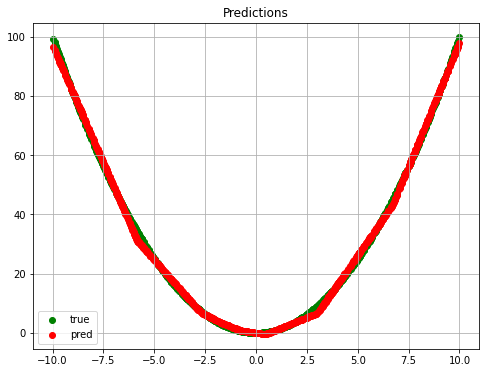

In [7]:
# Visualize results
plt.scatter(xs, y_true, color="g", label="true")
plt.scatter(xs, y_preds, color="r", label="pred")

plt.title("Predictions")
plt.legend()
plt.grid("on")

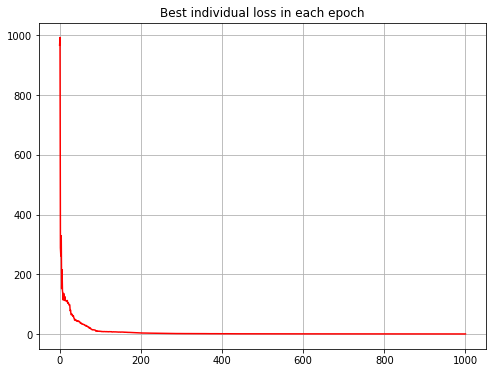

In [8]:
# Visualize loss function
min_losses = [min(losses) for losses in experiment.losses_per_epoch]

plt.plot(range(len(experiment.losses_per_epoch)), min_losses, color="r")
plt.title("Best individual loss in each epoch")
plt.grid("on")

In [2]:
dataset = dutils.UniformDistribution(1, -4 * 3.14, 4*3.14)

optimizer = optim.MuLambdaEvolutionStrategy(
    mu_value=25,
    lambda_value=100,
    optimized_func=object_fun.sinusoidal,    # in current experiment f(x) = x ** 2
    dataset=dataset,
)

In [3]:
experiment = optimizer.optimize(
    experiment_name="test",
    in_channels=1,
    n_hidden_neurons=30,
    out_channels=1,
    mutation_tau=0.5,
    mutation_tau_prime=0.5946,
    n_iters=300,
    probe_times=40,
    best_loss_treshold=1e-10,
)

Epoch 0 loss => 79.4336
Epoch 1 loss => 6.6994
Epoch 2 loss => 7.1992
Epoch 3 loss => 5.0240
Epoch 4 loss => 10.8823
Epoch 5 loss => 4.6220
Epoch 6 loss => 2.6978
Epoch 7 loss => 2.5083
Epoch 8 loss => 1.2052
Epoch 9 loss => 2.3644
Epoch 10 loss => 2.0437
Epoch 11 loss => 2.0747
Epoch 12 loss => 2.0703
Epoch 13 loss => 1.7143
Epoch 14 loss => 1.7441
Epoch 15 loss => 1.7859
Epoch 16 loss => 1.5328
Epoch 17 loss => 1.0841
Epoch 18 loss => 1.0381
Epoch 19 loss => 0.9635
Epoch 20 loss => 1.0410
Epoch 21 loss => 1.2002
Epoch 22 loss => 0.8186
Epoch 23 loss => 0.8354
Epoch 24 loss => 0.7495
Epoch 25 loss => 0.6855
Epoch 26 loss => 0.6522
Epoch 27 loss => 0.6331
Epoch 28 loss => 0.6081
Epoch 29 loss => 0.6816
Epoch 30 loss => 0.5063
Epoch 31 loss => 0.5391
Epoch 32 loss => 0.5888
Epoch 33 loss => 0.5703
Epoch 34 loss => 0.5828
Epoch 35 loss => 0.4915
Epoch 36 loss => 0.4634
Epoch 37 loss => 0.5217
Epoch 38 loss => 0.5871
Epoch 39 loss => 0.4730
Epoch 40 loss => 0.4520
Epoch 41 loss => 0.5134


In [4]:
# Computes result for visualization
best_individual = experiment.best_individual

xs = []
y_true = []
y_preds = []

for _, x in zip(range(1000), dataset):
    xs.append(x)
    y_true.append(optimizer.optimized_func(x))
    y_preds.append(best_individual.predict(x))

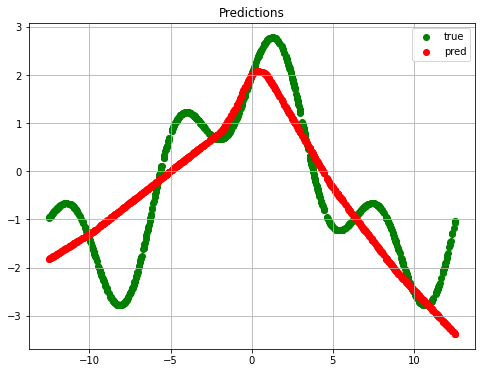

In [5]:
# Visualize results
plt.scatter(xs, y_true, color="g", label="true")
plt.scatter(xs, y_preds, color="r", label="pred")

plt.title("Predictions")
plt.legend()
plt.grid("on")

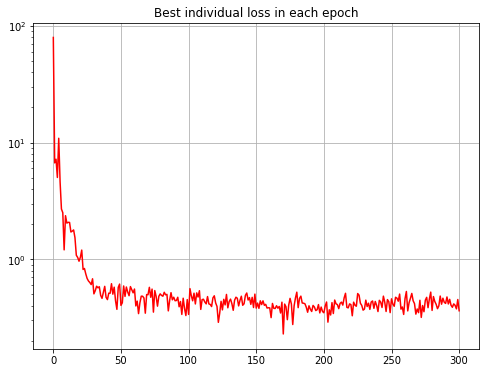

In [8]:
# Visualize loss function
min_losses = [min(losses) for losses in experiment.losses_per_epoch]
plt.yscale(value=('log'))
plt.plot(range(len(experiment.losses_per_epoch)), min_losses, color="r")
plt.title("Best individual loss in each epoch")
plt.grid("on")

In [9]:
dataset = dutils.RandintGenerator(1)

optimizer = optim.MuLambdaEvolutionStrategy(
    mu_value=25,
    lambda_value=100,
    optimized_func=object_fun.xor,    # in current experiment f(x) = x ** 2
    dataset=dataset,
)

In [11]:
experiment = optimizer.optimize(
    experiment_name="test",
    in_channels=2,
    n_hidden_neurons=30,
    out_channels=1,
    mutation_tau=0.5,
    mutation_tau_prime=0.5946,
    n_iters=300,
    probe_times=40,
    best_loss_treshold=1e-10,
)

Epoch 0 loss => 0.4851
Epoch 1 loss => 1.5152
Epoch 2 loss => 1.0908
Epoch 3 loss => 0.7325
Epoch 4 loss => 0.5793
Epoch 5 loss => 0.0929
Epoch 6 loss => 0.2938
Epoch 7 loss => 0.1930
Epoch 8 loss => 0.1825
Epoch 9 loss => 0.1435
Epoch 10 loss => 0.1659
Epoch 11 loss => 0.1148
Epoch 12 loss => 0.1282
Epoch 13 loss => 0.0901
Epoch 14 loss => 0.1019
Epoch 15 loss => 0.1052
Epoch 16 loss => 0.1022
Epoch 17 loss => 0.0918
Epoch 18 loss => 0.0763
Epoch 19 loss => 0.0711
Epoch 20 loss => 0.0755
Epoch 21 loss => 0.0463
Epoch 22 loss => 0.0416
Epoch 23 loss => 0.0422
Epoch 24 loss => 0.0337
Epoch 25 loss => 0.0366
Epoch 26 loss => 0.0155
Epoch 27 loss => 0.0206
Epoch 28 loss => 0.0154
Epoch 29 loss => 0.0148
Epoch 30 loss => 0.0082
Epoch 31 loss => 0.0037
Epoch 32 loss => 0.0019
Epoch 33 loss => 0.0025
Epoch 34 loss => 0.0013
Epoch 35 loss => 0.0004
Epoch 36 loss => 0.0004
Epoch 37 loss => 0.0001
Epoch 38 loss => 0.0002
Epoch 39 loss => 0.0000
Epoch 40 loss => 0.0000
Epoch 41 loss => 0.0000
Ep